## Meta Data Center Key Metrics

Meta's data centers typically monitor these critical metrics:

1. **Power Usage Effectiveness (PUE)** - Ratio of total facility energy to IT equipment energy
2. **Water Usage Effectiveness (WUE)** - Water consumption per unit of compute
3. **Carbon Usage Effectiveness (CUE)** - Carbon emissions per unit of compute
4. **Server Utilization** - Percentage of server capacity being used
5. **Network Throughput** - Data transfer rates across the network
6. **Storage Performance** - IOPS, latency, and throughput measures
7. **Temperature and Humidity** - Environmental conditions within the facility
8. **Downtime/Availability** - Uptime percentage and service disruptions
9. **Energy Consumption** - Total power consumption in kWh
10. **Cooling Efficiency** - Effectiveness of cooling systems

## Simplified Data Tables with Metadata

Here are simplified data tables that might exist in Meta's data center monitoring systems:

### 1. `server_metrics`
- `server_id` (string): Unique identifier for each server
- `timestamp` (datetime): When the measurement was taken
- `cpu_utilization` (float): Percentage of CPU usage (0-100)
- `memory_utilization` (float): Percentage of memory usage (0-100)
- `network_throughput` (float): Network throughput in Gbps
- `power_consumption` (float): Power consumption in kW

### 2. `facility_metrics`
- `facility_id` (string): Unique identifier for each data center facility
- `timestamp` (datetime): When the measurement was taken
- `total_power` (float): Total power consumed by the facility in kW
- `it_power` (float): Power consumed by IT equipment in kW
- `temperature` (float): Average temperature in Celsius
- `humidity` (float): Average humidity percentage
- `water_usage` (float): Water consumption in cubic meters

### 3. `carbon_metrics`
- `facility_id` (string): Unique identifier for each data center facility
- `timestamp` (datetime): When the measurement was taken
- `carbon_emissions` (float): Carbon emissions in metric tons
- `renewable_percentage` (float): Percentage of power from renewable sources

### 4. `incident_records`
- `incident_id` (string): Unique identifier for each incident
- `facility_id` (string): Affected facility
- `start_time` (datetime): When the incident began
- `end_time` (datetime): When the incident was resolved
- `severity` (int): Severity level (1-5)
- `description` (string): Description of the incident
- `impact` (string): Impact on operations

## Python/Pandas Question

Now I'll give you a question to solve using Python and pandas:

"Using the `server_metrics` and `facility_metrics` tables, write a Python function that calculates the hourly average PUE (Power Usage Effectiveness) for each facility over a given date range. Then, identify the three facilities with the highest average PUE during peak hours (12:00-18:00) and visualize their PUE trends over time using a line chart.

Assume both tables are available as pandas DataFrames named `server_metrics_df` and `facility_metrics_df`."

Once you provide your solution, I'll evaluate it based on correctness, efficiency, and clarity.

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a random seed for reproducibility
np.random.seed(42)

# Create sample data
# Start date and end date for our date range (7 days)
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 7)

# List of facility IDs
facility_ids = ['FAC001', 'FAC002', 'FAC003', 'FAC004', 'FAC005']

# Generate timestamps for every hour in the date range
timestamps = []
current_date = start_date
while current_date <= end_date:
    timestamps.append(current_date)
    current_date += timedelta(hours=1)

# Create an empty list to store our data
data = []

# Generate data for each facility at each timestamp
for facility_id in facility_ids:
    for ts in timestamps:
        # Generate random values with some patterns
        # Make PUE vary by hour of day (higher in afternoon)
        hour_factor = 1.0 + 0.05 * (1 if 12 <= ts.hour <= 17 else 0)
        
        # Add some facility-specific bias (FAC003 and FAC004 have higher PUE)
        facility_factor = 1.0
        if facility_id == 'FAC003':
            facility_factor = 1.15
        elif facility_id == 'FAC004':
            facility_factor = 1.12
            
        # Generate data with realistic patterns
        total_power = np.random.uniform(800, 1200) * facility_factor * hour_factor
        it_power = total_power / (np.random.uniform(1.1, 1.4) * facility_factor)
        
        data.append({
            'facility_id': facility_id,
            'timestamp': ts,
            'total_power': total_power,
            'it_power': it_power,
            'temperature': np.random.uniform(18, 25),
            'humidity': np.random.uniform(40, 60),
            'water_usage': np.random.uniform(50, 150) * facility_factor
        })

# Create DataFrame
facility_metrics_df = pd.DataFrame(data)

# Display sample data
print(f"Total records: {len(facility_metrics_df)}")
print("\nSample of the data:")
print(facility_metrics_df.head())

# Display basic statistics
print("\nBasic statistics:")
print(facility_metrics_df.describe())

# Check for each facility
print("\nRecords per facility:")
print(facility_metrics_df['facility_id'].value_counts())

# Calculate PUE for verification
facility_metrics_df['pue'] = facility_metrics_df['total_power'] / facility_metrics_df['it_power']
print("\nPUE statistics by facility:")
print(facility_metrics_df.groupby('facility_id')['pue'].describe())

# Sample of what the data looks like with calculated PUE
print("\nSample with calculated PUE:")
print(facility_metrics_df[['facility_id', 'timestamp', 'total_power', 'it_power', 'pue']].head(10))

Total records: 725

Sample of the data:
  facility_id           timestamp  total_power    it_power  temperature  \
0      FAC001 2023-01-01 00:00:00   949.816048  685.681669    23.123958   
1      FAC001 2023-01-01 01:00:00   862.397808  771.772373    24.063233   
2      FAC001 2023-01-01 02:00:00   808.233798  581.056443    23.827098   
3      FAC001 2023-01-01 03:00:00   873.361804  733.133416    21.673295   
4      FAC001 2023-01-01 04:00:00  1044.741158  914.956293    20.045013   

    humidity  water_usage  
0  51.973170    65.601864  
1  52.022300   120.807258  
2  44.246782    68.182497  
3  48.638900    79.122914  
4  47.327237    95.606998  

Basic statistics:
                 timestamp  total_power     it_power  temperature    humidity  \
count                  725   725.000000   725.000000   725.000000  725.000000   
mean   2023-01-04 00:00:00  1068.370272   813.730380    21.436819   49.927762   
min    2023-01-01 00:00:00   804.398331   578.636107    18.000081   40.101232  

/var/folders/56/fsddj99x0bb1w5gqs1z1j95r0000gn/T/ipykernel_7295/117181325.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_pue_df = filter_facility_metrics.groupby(['facility_id','hour']).apply(get_avg_pue)


<Axes: xlabel='hour'>

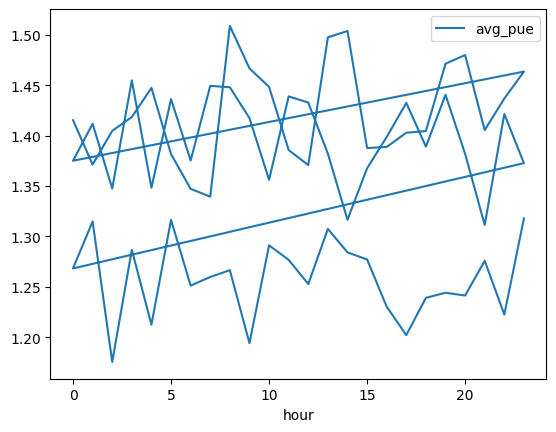

In [29]:

# Power Usage Effectiveness (PUE) - Ratio of total facility energy to IT equipment energy

# Calculating hurly average PUE over the date range
facility_metrics_df['day'] = facility_metrics_df['timestamp'].dt.day
facility_metrics_df['hour'] = facility_metrics_df['timestamp'].dt.hour

def get_avg_pue(group):
    return group['total_power'].sum()/group['it_power'].sum()

filter_facility_metrics = facility_metrics_df[(facility_metrics_df['timestamp']>=start_date) &  (facility_metrics_df['timestamp']<=end_date)]
avg_pue_df = filter_facility_metrics.groupby(['facility_id','hour']).apply(get_avg_pue)
avg_pue_df = avg_pue_df.reset_index()
avg_pue_df.columns = ['facility_id','hour','avg_pue']

# Identifying the top 3 facilities
filter_df = avg_pue_df[(avg_pue_df['hour']>=12) & (avg_pue_df['hour']<=18)]
facility_pue_df = avg_pue_df.groupby('facility_id')['avg_pue'].aggregate({'mean','std'})
facility_pue_df = facility_pue_df.reset_index()
facility_pue_df.columns = ['facility_id','mean','std']
facility_pue_df.sort_values(by=['mean','std'],ascending=[False,False],inplace=True)
facility_pue_df['mean_std'] = facility_pue_df['mean']*facility_pue_df['std']
facility_pue_df['facility_rank'] = facility_pue_df['mean_std'].rank(method='dense',ascending=False)
reqd_facilities = facility_pue_df['facility_id'][facility_pue_df['facility_rank']<=3]

# Plotting the top 3 facilities average hourly PUE
avg_pue_df[avg_pue_df['facility_id'].isin(reqd_facilities)].plot(x='hour',y='avg_pue',kind='line')

Problem 1: String Character Frequency
Write a function that takes a string as input and returns a dictionary where the keys are the characters in the string and the values are the frequencies of those characters. The function should ignore case (treat uppercase and lowercase as the same) and only count alphanumeric characters (letters and numbers). Return the dictionary sorted by character frequency in descending order, and in case of ties, sort alphabetically.

In [35]:
# Input: "Hello, World! 123"
# Output: {'l': 3, 'o': 2, '1': 1, '2': 1, '3': 1, 'd': 1, 'e': 1, 'h': 1, 'r': 1, 'w': 1}

# input = "Hello, World! 123"
input =''
def count_char_freq(input):
    return_dict = {}
    for ch in input.lower():
        if ch.isalnum():
            if ch in return_dict:
                return_dict[ch] = return_dict[ch] + 1
            else:
                return_dict[ch] = 1
        else:
            continue
    ans = dict(sorted(return_dict.items(), key=lambda item: (-item[1], item[0])))
    return ans
count_char_freq(input)


{}

Problem 2: Valid Parentheses
Write a function that takes a string containing just the characters '(', ')', '{', '}', '[' and ']', and determines if the input string is valid. The string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Every close bracket has a corresponding open bracket of the same type.

In [44]:
string_input = "([)]"

def valid_parentheses(string_input):
    stack = []
    bracket_map = {'(':')','{':'}','[':']'}
    for par in string_input:
        if par in bracket_map.keys():
            stack.append(par)
        else:
            top = stack.pop()
            if bracket_map[top]==par:
                continue
            else:
                return False
    if len(stack)>0:
        return False
    else:
        return True
valid_parentheses(string_input)
            
            

False

Problem 3: Matrix Island Count
You are given a 2D grid representing a map where:

'1' represents land
'0' represents water

An island is formed by connecting adjacent lands horizontally or vertically (not diagonally). You need to count the number of islands in the given grid.

In [83]:
mat_input = [
  ['1', '0', '0', '1', '1'],
  ['1', '0', '1', '1', '0'],
  ['0', '0', '0', '0', '0'],
  ['1', '0', '1', '0', '1']
]

def dfs(r, c, grid, visited, rows, cols):
    # Check if out of bounds or if current cell is water
    if r < 0 or c < 0 or r >= rows or c >= cols or grid[r][c] == '0' or (r,c) in visited:
        return
    
    # Mark current cell as visited by changing it to '0'
    visited.append((r,c))
    
    # Explore all four adjacent cells
    dfs(r + 1, c, grid, visited, rows, cols)  # down
    dfs(r - 1, c, grid, visited, rows, cols)  # up
    dfs(r, c + 1, grid, visited, rows, cols)  # right
    dfs(r, c - 1, grid, visited, rows, cols)  # left

def num_islands(grid):
    """
    Count the number of islands in a 2D grid.
    
    Args:
        grid: 2D array where '1' represents land and '0' represents water
        
    Returns:
        Number of islands in the grid
    """
    if not grid or not grid[0]:
        return 0
    
    rows, cols = len(grid), len(grid[0])
    island_count = 0
    visited = []
    
    # Iterate through each cell in the grid
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == '1' and (r,c) not in visited:
                # Found a land cell, start DFS to explore the island
                island_count += 1
                dfs(r, c,grid, visited, rows, cols)
                
    return island_count
print(num_islands(mat_input))
                

5


In [61]:
mat_input[3][4]

'1'

SQL Interview Question for Chime Data Analyst Position
Scenario:
Imagine Chime wants to understand engagement patterns with their SpotMe feature (fee-free overdraft protection) and how it relates to user retention and overall product health.
You have access to the following tables:
users

user_id (primary key)
signup_date
acquisition_channel
has_direct_deposit (boolean)
last_active_date

transactions

transaction_id (primary key)
user_id (foreign key)
transaction_date
transaction_amount
merchant_category
is_spotme (boolean: whether transaction used SpotMe overdraft protection)

spotme_limits

user_id (primary key)
current_limit_amount
last_updated_date
number_of_increases

Questions:
Part 1: Feature Adoption Analysis
Write a SQL query to identify the percentage of eligible users (those with direct deposit) who have used the SpotMe feature at least once in each month of 2023. Show the monthly trend.

Part 2: Impact on Retention
Write a SQL query to compare the 90-day retention rates between two cohorts:
Users who used SpotMe in their first month after signup
Users who were eligible for SpotMe but did not use it in their first month after signup
Define a "retained user" as someone who had at least one transaction in the 90-day period after their first month.

Part 3: Product Health Metrics
Write a SQL query that creates a summary dashboard showing:
Average SpotMe usage amount per user
Percentage of SpotMe transactions that are repaid within 7 days
SpotMe usage frequency (average number of times per month an active SpotMe user uses the feature)
Distribution of SpotMe transactions by merchant category (top 5 categories)

Break this down by user tenure cohorts (0-3 months, 3-6 months, 6-12 months, 12+ months).

In [85]:
# Part 1: Feature Adoption Analysis Write a SQL query to identify the percentage of eligible users (those with direct deposit) 
# who have used the SpotMe feature at least once in each month of 2023. 
# Show the monthly trend. 

eligible_users=users with direct deposit
users who have used spotme->transactions, is_spotme


output:
2023-MM-01 -> % of users with direct deposit

select date_trunc(tr.transaction_date,month)
, count(distinct usr.user_id) as elgible_users
, count(distinct case when tr.is_spotme=True then tr.user_id end) as eligible_spotme_user
, round(count(distinct case when tr.is_spotme=True then tr.user_id end)*100/count(distinct usr.user_id),2) as percentage
from users usr
inner join transactions tr
on usr.user_id=tr.user_id
where usr.signup_date<=tr.transaction_date 
and extract(year from tr.transaction_date)=2023)
and usr.has_direct_depost=True
group by 1
order by 1





SyntaxError: invalid syntax (4133895742.py, line 5)

In [ ]:
Part 2: Impact on Retention Write a SQL query to compare the 90-day retention rates between two cohorts
: Users who used SpotMe in their first month after signup 
Users who were eligible for SpotMe but did not use it in their first month after signup 
Define a "retained user" as someone who had at least one transaction in the 90-day period after their first month.

Cohort 1: Users who used SpotMe in their first month after signup
Cohort 2: Users who were eligible for SpotMe but did not use it in their first month after signup 

Output:
signup_date  | Cohort 1 | Cohort 2 | Cohort1_retention | Cohort2_retention

with int_tab as (
     select 
        usr.user_id
        , case 
            when tr.transaction_date is not null
            and tr.transaction_date<usr.signup_date + 30 
            and tr.is_spotme=1 then 1 
          else 2 as cohorts
        , case 
            when tr.transaction_date is not null 
            and tr.transaction_date>usr_signup_date + 30 
            and tr.transaction_date<usr.signup_date + 120 then 1 
          else 0 as retained
        from users usr
        left join transactions tr
        on usr.user_id=tr.transaction_id   
)

select 
    date_trunc(signup_date, month) as signup_cohorts
    , count(distinct case when cohorts=1 then user_id end) as cohort1_users
    , count(distinct case when cohorts=2 then user_id end) as cohort2_users
    , round(count(distinct case when cohorts=1 and retained=1 then user_id end)*100
      /count(distinct case when cohorts=1 then user_id end),2) as cohort1_90day_retention
    , round(count(distinct case when cohorts=2 and retained=1 then user_id end)*100
      /count(distinct case when cohorts=2 then user_id end),2) as cohort1_90day_retention
from int_tab


In [ ]:
Part 3: Product Health Metrics
Write a SQL query that creates a summary dashboard showing:
Average SpotMe usage amount per user
Percentage of SpotMe transactions that are repaid within 7 days
SpotMe usage frequency (average number of times per month an active SpotMe user uses the feature)
Distribution of SpotMe transactions by merchant category (top 5 categories)
Break this down by user tenure cohorts (0-3 months, 3-6 months, 6-12 months, 12+ months).


User cohort breakdown by singup_date and transaction_date


    

with int_spotme_user_data as (
    select 
    date_trunc(transaction_date, month) as transaction_month
    , usr.user_id
    , avg(tr.transaction_amount) as avg_spotme_amount
    , count(*) as spotme_transactions
    from transactions
    where is_spotme=True
), spotme_transactions as (
    select 
        *
    from transactions
    where is_spotme=True
), repaid_transaction as (
    select 
    date_trunc(transaction_date, month) as transaction_month
    , count(distinct tr.transaction_id) as repaid_transactions
    from spotme_transactions spot_tr
    inner join transactions tr
    on spot_tr.user_id = tr.user_id
    where tr.transaction_is<>spot_tr.transaction_date
    and spot_tr.transaction_date - tr.transaction_date<=7
    and spot_tr.transaction_amount>-1*tr.transaction_amount
    group by 1
), merchant_data as (
    select 
        date_trunc(transaction_date, month) as transaction_month
        , tr.merchant_category
        , count(*) as transaction_count
        , row_number() over(partition by date_trunc(transaction_date, month) order by count(*) desc) as merchant_rank
    from transactions
    where is_spotme=True
    group by 1,2
    qualify merchant_rank<=5
), spotme_data as (
    select int_spotme_user_data.transaction_month
    , merchant_data.merchant_category
    , merchant_data.transaction_count
    , max(repaid_transaction.repaid_transactions)/sum(int_spotme_user_data.spotme_transactions) as repaid_percentage
    , avg(int_spotme_user_data.avg_spotme_amount) as avg_spotme_amount
    , sum(int_spotme_user_data.spotme_transactions)/count(distinct int_spotme_user_data.user_id) as spotme_usage_frequency
    from int_spotme_user_data
    left join repaid_transaction
    on int_spotme_user_data.transaction_month=repaid_transaction.transaction_month
    left join merchant_data
    on int_spotme_user_data.transaction_month=merchant_data.transaction_month
    group by 1,2,3
)
    
select 
    case 
        when date_diff(tr.transaction_mont, usr.signup_date, month) between 0 and 3 then '0-3 months'
        when date_diff(tr.transaction_mont, usr.signup_date, month) between 3 and 6  then '3-6 months'
        when date_diff(tr.transaction_mont, usr.signup_date, month) between 6 and 12 then '6-12 months'
        else '12+ months' 
    as user_cohort
    , spotme_data.*
from users usr
inner join spotme_data
on usr.user_id=spotme_data.user_id
where usr.signup_date<=spotme_data.transaction_month
group by 1


Given a DataFrame datacenter_metrics containing hourly measurements from multiple data centers 
with columns 'timestamp', 'datacenter_id', 'total_energy', 'it_energy', 'temperature', 'server_utilization', and 'cooling_energy'
, write a function that calculates the daily average PUE (Power Usage Effectiveness) for each data center,
identifies which data centers have PUE values significantly above the company average during peak temperature hours
(defined as temperature > 30Â°C), 
 and returns a sorted DataFrame of these problematic data centers with their average peak-hour PUE values 
 and the count of peak hours observed.
 

In [ ]:
datacenter_metrics = pd.DataFrame()


avg_peak_hour_pue_df = datacenter_metrics[datacenter_metrics['temperature']>30]
avg_peak_hour_pue = avg_peak_hour_pue_df.total_energy.sum()/avg_peak_hour_pue_df.it_energy.sum()

datacenter_metrics['day'] = datacenter_metrics['timestamp'].dt.day

def get_daily_pue_count(group):
    return pd.Series({
        'daily_pue': group['total_energy'].sum()/group['it_energy'].sum()
        , 'count_peak': len(group[group['temoperature']>30])
    })
daily_pue_df = datacenter_metrics[['datacenter_id','day','temperature','total_energy','it_energy']].groupby(['datacenter_id','day']).apply(get_daily_pue_count)



datacenter_df = avg_peak_hour_pue_df.groupby('datacenter_id').apply(lambda x: x.total_energy.sum()/x.it_energy.sum())
datacenter_df = datacenter_df.reset_index()
datacenter_df.columns = ['datacenter_id','avg_pue']
datacenter_df['pue_diff'] = datacenter_df['avg_pue']-avg_peak_hour_pue
datacenter_df.sort_values(by='pue_diff',ascending=False,inplace=True)

You're analyzing DoorDash order data to understand consumer behavior and marketplace dynamics.

## Database Tables:
- orders (order_id, customer_id, merchant_id, dasher_id, order_timestamp, delivery_timestamp, order_amount, delivery_fee, tip_amount, order_status)
- customers (customer_id, signup_date, city, state, is_dashpass)
- merchants (merchant_id, merchant_name, cuisine_type, city, state, commission_rate)

## Part 1: Basic Aggregation
Write a SQL query to find the total order value, average delivery time (in minutes), and order count for each cuisine type in California during January 2024. Sort the results by total order value in descending order.

## Part 2: Cohort Analysis
Write a SQL query to calculate the monthly retention rate for customers who made their first order in October 2023. Specifically, show what percentage of these new customers placed at least one order in each of the following three months (November 2023, December 2023, January 2024). A retained customer is defined as someone who placed at least one order in the given month.

## Part 3: Marketplace Optimization
DoorDash wants to identify potential delivery time issues by analyzing orders with longer-than-expected delivery times.
Write a SQL query that:

- Calculates the average delivery time for each city and cuisine type combination
- Identifies orders where the delivery time was at least 50% longer than the average for that city and cuisine type
- Groups these "delayed" orders by merchant and provides a count and percentage of their orders that were delayed
- Returns the top 10 merchants with the highest percentage of delayed orders (minimum 30 orders total)

Output merchant name, cuisine type, city, total order count, delayed order count, and percentage of delayed orders, sorted by the delay percentage in descending order.

In [ ]:
with city_cuisine_delivery_times as (
    select 
    mer.city
    , mer.cuisine_type
    , avg(timestampdiff(ord.order_timestamp, ord.deliver_timestamp, second)/60) as avg_delivery_time
    from orders ord
    inner join merchants mer 
    on ord.merchant_id=mer.merchant_id
), delayed_orders as (
    select ord.order_id
    from orders ord
    inner join merchants mer
    on ord.merchant_id=mer.merchant_id
    inner join city_cuisine_delivery_times city_cuisine
    on mer.city=city_cuisine.city
    and mer.cuisine_type=city_cuisine.cuisine_type
    where timestampdiff(ord.order_timestamp, ord.deliver_timestamp, second)/60>=1.5*city_cuisine.avg_delivery_time
), merchant_delayed_data as (
    select 
      mer.merchant_id
      , count(distinct ord.order_id) as total_orders
      , count(distinct d_ord.order_id) as total_delayed_orders
      , round(count(distinct d_ord.order_id)*100/count(distinct ord.order_id),2) as delayed_order_percentage
    from orders ord
    left join delayed_orders d_ord
    on ord.order_id=d_ord.order_id
    group by 1
)
select 
  mer.merchant_id
  , mer.city
  , mer.cuisine_type
  , mdd.total_orders
  , mdd.total_delayed_orders
  , mdd.delayed_order_percentage
from merchants mer
inner join merchant_delayed_data mdd
on mer.merchant_id=mdd.merchant_id
where mdd.total_orders>=30
order by mdd.delayed_order_percentage desc
limit 10

In [ ]:
select 
  mer.cuisine_type
  , sum(ord.order_amount) as total_order_value
  , avg(date_diff(ord.order_timestamp, ord.delivery_timestamp, second)/60) as avg_delivery_time
from orders ord
inner join customers cust
on ord.customer_id=cust.customer_id
inner join merchants mer
on ord.merchant_id=mer.merchant_id
where state='CA'
and ord.order_timestamp between '2024-01-01' and '2024-02-01'
group by 1
order by 2 desc


In [ ]:
with base_customers as (
    select 
      distinct customer_id
    from orders
    group by 1
    having min(order_timestamp) between '2023-10-01' and '2023-11-01'
), int_retention as (
    select 
      cust.customer_id
      , count(distinct case when order_timestamp between '2023-11-01' and '2023-12-01' then order_id end) as num_nov2023_orders
      , count(distinct case when order_timestamp between '2023-12-01' and '2024-01-01' then order_id end) as num_dec2023_orders
      , count(distinct case when order_timestamp between '2024-01-01' and '2024-02-01' then order_id end) as num_jan2024_orders
    from customers cust
    left join orders ord
    on cust.customer_id = ord.customer_id
    where ord.order_timestamp is null 
    or ord.order_timestamp between '2023-11-01' and '2024-02-01'
)

select 
  count(distinct customer_id) as total_oct_customers
  , count(distinct case when num_oct2023_orders>0 then customer_id end)/count(distinct customer_id) as retained_nov_customers
  , count(distinct case when num_dec2023_orders>0 then customer_id end)/count(distinct customer_id) as retained_dec_customers
  , count(distinct case when num_jan2024_orders>0 then customer_id end)/count(distinct customer_id) as retained_jan_customers
from int_retention


# Datacenter Performance Analysis Question

## Context:
At Meta, we collect extensive metrics from our datacenters to monitor performance, efficiency, and identify optimization opportunities.

## Part 1 (Easy):
You're given a DataFrame server_metrics with the following columns:
- timestamp: Datetime of the measurement
- server_id: Unique identifier for each server
- cpu_utilization: Percentage of CPU usage (0-100)
- memory_utilization: Percentage of memory usage (0-100)
- power_consumption: Power consumption in watts

Write a function that:

- Filters the data for the last 24 hours
- Groups the data by server_id
- Calculates the average CPU utilization, average memory utilization, and total power consumption for each server
- Returns a new DataFrame with servers that have either average CPU utilization > 80% or average memory utilization > 75%
- Sorts the result by power consumption in descending order

## Part 2 (Medium):
The datacenter team wants to analyze the relationship between server utilization and power efficiency. They define "power efficiency" as the ratio of average utilization (mean of CPU and memory) to power consumption.
Extend your solution to:

- Calculate hourly averages of CPU utilization, memory utilization, and power consumption for each server
- Identify "inefficient servers" - servers whose power efficiency decreased by more than 15% during peak hours (9:00-17:00) compared to off-peak hours
- Return a DataFrame with these inefficient servers, including columns for:

server_id
peak_power_efficiency (average during peak hours)
off_peak_power_efficiency (average during off-peak hours)
efficiency_drop_percentage (percentage decrease)
average_power_consumption

In [ ]:
server_metrics = pd.DataFrame()

server_metrics['hour'] = pd.to_datetime(server_metrics['timestamp']).dt.hour

def get_avg_metrics(group):
    return pd.Series({
        'avg_cpu_utilization': group['cpu_utilization'].mean()
        , 'avg_memory_utilization': group['memory_utilization'].mean()
        , 'avg_power_consumption': group['power_consumption'].mean()
        , 'peak_hour': 1 if group['hour']>=9 and group['hour']<=17 else 0
    })

def get_peak_non_peak_metrics(group):
    avg_peak_power_efficiency = group[group['peak_hour']==1]['power_efficiency'].mean()
    avg_non_peak_power_efficiency = group[group['peak_hour']==0]['power_efficiency'].mean()
    efficiency_drop = avg_peak_power_efficiency/avg_non_peak_power_efficiency
    return pd.Series({
        'avg_peak_power_efficiency': avg_peak_power_efficiency
        , 'avg_non_peak_power_efficiency': avg_non_peak_power_efficiency
        , 'efficiency_drop': efficiency_drop
    })

def get_inefficient_servers(df):
    temp_df = df.copy()
    temp_df['hour'] = pd.to_datetime(temp_df['timestamp']).dt.hour
    avg_utilization_df = temp_df.groupby(['server_id', 'hour']).apply(get_avg_metrics).reset_index()
    avg_utilization_df.columns = ['server_id', 'hour', 'avg_cpu_utilization', 'avg_memory_utilization', 'avg_power_consumption', 'peak_hour']
    avg_utlization_df['power_efficiency'] = (avg_utilization_df['avg_cpu_utilization'] + avg_utilization_df['avg_memory_utilization'])/2
    avg_utlization_df['power_efficiency'] = avg_utilization_df['power_efficiency']/avg_utilization_df['avg_power_consumption']

    peak_non_peak_df = avg_utilization_df.groupby(['server_id']).apply(get_peak_non_peak_metrics).reset_index()
    peak_non_peak_df.columns = ['server_id', 'avg_peak_power_efficiency', 'avg_non_peak_power_efficiency', 'efficiency_drop']

    return_df = pd.merge(peak_non_peak_df[peak_non_peak_df['efficiency_drop']<0.15], avg_utilization_df[['server_id', 'avg_power_utilization']], on='server_id', how='inner')

    return return_df
get_inefficient_servers(server_metrics)


In [ ]:
import pandas as pd
import datetime as datetime
server_metrics = pd.DataFrame()

current_date = datetime.date.today()

def get_metrics(group):
    return pd.Series({
        'avg_cpu_utilization': group['cpu_utilization'].mean()
        , 'avg_memory_utilization': group['memory_utilization'].mean()
        , 'total_power_consumption': group['power_consumption'].sum()
    })

def get_utilization_df(df,current_date):
    temp_df = df.copy()
    date_diff = (pd.to_datetime(temp_df['timestamp']) - current_date).dt.days
    day_df = temp_df[date_diff<=1]

    group_df = day_df.groupby('server_id').apply(get_metrics).reset_index()
    group_df.columns = ['server_id','avg_cpu_utilization','avg_memory_utilization','total_power_consumption']

    filter_df = group_df[(group_df['avg_cpu_utilization']>80) | (group_df['avg_memory_utilization']>75)]

    return filter_df.sort_values(by='total_power_consumption',ascending=False)
get_utilization_df(server_metrics,current_date)

In [16]:
import pandas as pd
pd.to_datetime('2024-10-01')
(pd.to_datetime('2024-10-01') - pd.to_datetime('2024-09-01')).seconds

0

In [3]:
def generate_data():
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta
    
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Generate date range for 7 days with hourly intervals
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 1, 7, 23)
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    
    # Define data centers and servers
    datacenters = ['DC1', 'DC2', 'DC3']
    servers_per_dc = 5
    server_ids = [f"{dc}_SRV{i}" for dc in datacenters for i in range(1, servers_per_dc+1)]
    
    # Generate server_metrics DataFrame
    server_data = []
    for dc in datacenters:
        for server in [s for s in server_ids if s.startswith(dc)]:
            for ts in date_range:
                # Create daily and hourly patterns in utilization
                hour_factor = 0.2 * np.sin(ts.hour * np.pi / 12) + 1  # Higher during day
                
                # Base utilization with some randomness
                base_cpu = 50 + np.random.normal(0, 10)
                base_memory = 60 + np.random.normal(0, 8)
                
                server_data.append({
                    'timestamp': ts,
                    'server_id': server,
                    'datacenter_id': dc,
                    'cpu_utilization': min(max(base_cpu * hour_factor, 5), 95),
                    'memory_utilization': min(max(base_memory * hour_factor, 10), 95)
                })
    
    server_metrics = pd.DataFrame(server_data)
    
    # Generate power_metrics DataFrame
    power_data = []
    for dc in datacenters:
        for ts in date_range:
            # Get average utilization for this datacenter and timestamp
            dc_servers = server_metrics[(server_metrics['datacenter_id'] == dc) & 
                                      (server_metrics['timestamp'] == ts)]
            avg_util = (dc_servers['cpu_utilization'].mean() + dc_servers['memory_utilization'].mean()) / 2
            
            # Base IT power with variation based on utilization
            it_power = 100 + (avg_util * 1.5) + np.random.normal(0, 5)
            
            # PUE varies by datacenter
            if dc == 'DC1':
                base_pue = 1.2
            elif dc == 'DC2':
                base_pue = 1.3
            else:
                base_pue = 1.25
                
            # Add some random cooling inefficiency periods
            if np.random.random() < 0.05:  # 5% chance of inefficiency
                pue_factor = 1.2  # 20% higher PUE
            else:
                pue_factor = 1.0
                
            total_power = it_power * base_pue * pue_factor
            
            power_data.append({
                'timestamp': ts,
                'datacenter_id': dc,
                'total_power': total_power,
                'it_power': it_power
            })
    
    power_metrics = pd.DataFrame(power_data)
    
    # Generate temperature_data DataFrame
    temp_data = []
    for dc in datacenters:
        for ts in date_range:
            # Temperature varies with time of day
            hour_factor = np.sin(ts.hour * np.pi / 12)  # Peak at noon
            day_offset = np.sin(ts.day * np.pi / 15) * 3  # Some day-to-day variation
            
            # Base temperatures vary by datacenter
            if dc == 'DC1':
                base_ext_temp = 25
                base_int_temp = 21
            elif dc == 'DC2':
                base_ext_temp = 28
                base_int_temp = 22
            else:
                base_ext_temp = 23
                base_int_temp = 20
                
            external_temp = base_ext_temp + (5 * hour_factor) + day_offset + np.random.normal(0, 1)
            internal_temp = base_int_temp + (2 * hour_factor) + np.random.normal(0, 0.5)
            
            temp_data.append({
                'timestamp': ts,
                'datacenter_id': dc,
                'external_temp': external_temp,
                'internal_temp': internal_temp
            })
    
    temperature_data = pd.DataFrame(temp_data)
    
    # Print sample of each DataFrame
    print("Server Metrics Sample:")
    print(server_metrics.head())
    print("\nPower Metrics Sample:")
    print(power_metrics.head())
    print("\nTemperature Data Sample:")
    print(temperature_data.head())
    
    return server_metrics, power_metrics, temperature_data
server_metrics, power_metrics, temperature_data = generate_data()

Server Metrics Sample:
            timestamp server_id datacenter_id  cpu_utilization  \
0 2023-01-01 00:00:00  DC1_SRV1           DC1        54.967142   
1 2023-01-01 01:00:00  DC1_SRV1           DC1        59.400344   
2 2023-01-01 02:00:00  DC1_SRV1           DC1        52.424313   
3 2023-01-01 03:00:00  DC1_SRV1           DC1        75.096540   
4 2023-01-01 04:00:00  DC1_SRV1           DC1        53.152357   

   memory_utilization  
0           58.893886  
1           75.920770  
2           63.939595  
3           75.493012  
4           75.484578  

Power Metrics Sample:
            timestamp datacenter_id  total_power    it_power
0 2023-01-01 00:00:00           DC1   220.278557  183.565464
1 2023-01-01 01:00:00           DC1   212.962512  177.468760
2 2023-01-01 02:00:00           DC1   232.323411  193.602843
3 2023-01-01 03:00:00           DC1   246.141679  205.118066
4 2023-01-01 04:00:00           DC1   222.872289  185.726907

Temperature Data Sample:
            timestamp

/var/folders/56/fsddj99x0bb1w5gqs1z1j95r0000gn/T/ipykernel_2859/2637689513.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='H')


## Data Center Efficiency Analysis

# Context:
Meta's data center team collects various metrics to monitor performance and energy efficiency. You're given three DataFrames:

server_metrics: Hourly server performance data

- timestamp: DateTime of measurement
- server_id: Unique server identifier
- datacenter_id: Which data center the server is in
- cpu_utilization: Percentage of CPU used (0-100)
- memory_utilization: Percentage of memory used (0-100)


power_metrics: Hourly power consumption data

- timestamp: DateTime of measurement
- datacenter_id: Data center identifier
- total_power: Total power consumption in kW
- it_power: Power used by IT equipment in kW


temperature_data: Hourly temperature readings

- timestamp: DateTime of measurement
- datacenter_id: Data center identifier
- external_temp: Outside temperature in Celsius
- internal_temp: Inside temperature in Celsius



Task:
Write a pandas function that:

- Merges these datasets to analyze the relationship between server utilization, power efficiency, and temperature
- Calculates hourly PUE (Power Usage Effectiveness) for each data center (PUE = total_power / it_power)

- Identifies periods of "inefficient cooling" defined as times when:
    - PUE is more than 15% higher than the data center's average PUE
    - External temperature is not unusually high (within 1 standard deviation of mean)
    - Server utilization (average of CPU and memory) is within normal range (within 1 standard deviation of mean)


Returns a DataFrame with inefficient cooling periods including:

datacenter_id
timestamp
duration (number of consecutive hours of inefficient cooling)
average_pue during the period
utilization_impact (correlation between PUE and average utilization during the period)



Your analysis should help the team identify cooling inefficiencies that aren't explained by external temperature or unusual server load.

In [35]:
# Merges these datasets to analyze the relationship between server utilization, power efficiency, and temperature
# Assuming that inner join works well here, no problems with ETLs which could lead to missing rows
import pandas as pd

avg_pue = power_metrics.total_power.sum()/power_metrics.it_power.sum()
avg_temp = temperature_data.external_temp.mean()
std_temp = temperature_data.external_temp.std()
server_metrics['utilization'] = (server_metrics.cpu_utilization + server_metrics.memory_utilization)/2
avg_util = server_metrics.utilization.mean()
std_util = server_metrics.utilization.std()

power_metrics['hour'] = power_metrics.timestamp.dt.hour
power_metrics['day'] = power_metrics.timestamp.dt.date
hourly_pue = power_metrics.groupby(['datacenter_id', 'day', 'hour']).apply(lambda x: x.total_power.sum()/x.it_power.sum()).reset_index()
hourly_pue.columns = ['datacenter_id', 'day', 'hour', 'avg_hourly_pue']

temperature_data['hour'] = temperature_data.timestamp.dt.hour
temperature_data['day'] = temperature_data.timestamp.dt.date
def get_mean_temp(group):
    mean_temp = group.external_temp.mean()
    high_flag = 0
    if mean_temp<avg_temp + std_temp or mean_temp>avg_temp - std_temp:
        high_flag = 1
    return pd.Series({
        'mean_temp': mean_temp
        , 'high_flag_temp': high_flag
    })
hourly_temperature = temperature_data.groupby(['datacenter_id', 'day', 'hour']).apply(get_mean_temp).reset_index()
hourly_temperature.columns = ['datacenter_id', 'day', 'hour', 'hourly_mean_temp', 'high_flag_temp']

server_metrics['hour'] = server_metrics.timestamp.dt.hour
server_metrics['day'] = server_metrics.timestamp.dt.date
def get_mean_utilization(group):
    mean_util = group.utilization.mean()
    high_flag = 0
    if mean_util<avg_util + std_util or mean_util>avg_temp - std_util:
        high_flag = 1
    return pd.Series({
        'mean_temp': mean_util
        , 'high_flag_util': high_flag
    })
hourly_util = server_metrics.groupby(['datacenter_id', 'day', 'hour']).apply(get_mean_utilization).reset_index()
hourly_util.columns = ['datacenter_id', 'day', 'hour', 'hourly_mean_util', 'high_flag_util']


server_power_df = pd.merge(hourly_util, hourly_pue, on=['datacenter_id', 'day', 'hour'], how='inner')
merged_df = pd.merge(server_power_df, hourly_temperature, on=['datacenter_id', 'day', 'hour'], how='inner')
# merged_df['prev_day'] = merged_df['day'].shift(1)
# merged_df['prev_hour'] = merged_df['hour'].shift(1)
# merged_df['int_continuous_flag'] = merged_df['day'] + merged_df['hour'] - merged_df['prev_day'] - merged_df['prev_hour']

inefficient_cooling_df = merged_df[(merged_df.avg_hourly_pue>1.15*avg_pue) & (merged_df.high_flag_temp==1) & (merged_df.high_flag_util==1)]


inefficient_cooling_df = inefficient_cooling_df.sort_values(['datacenter_id', 'day', 'hour'])

inefficient_cooling_df['day_hour'] = inefficient_cooling_df[['day','hour']].apply(lambda x: x['day'] + pd.DateOffset(hours=x['hour']),axis=1)
inefficient_cooling_df['prev_day_hour'] = inefficient_cooling_df['day_hour'].shift(1)
inefficient_cooling_df['prev_dc'] = inefficient_cooling_df['datacenter_id'].shift(1)

def get_cont_flag(row):
    if row['prev_dc']!=row['datacenter_id']:
        return 1
    time_diff = (row['day_hour'] - row['prev_day_hour']).total_seconds()/3600
    if time_diff>1:
        return 1
    return 0
        
inefficient_cooling_df['new_group'] = inefficient_cooling_df.apply(get_cont_flag,axis=1)
inefficient_cooling_df['group_id'] = inefficient_cooling_df['new_group'].cumsum()



# Create a helper column to identify breaks in continuity
# inefficient_cooling_df['prev_day'] = inefficient_cooling_df['day'].shift(1)
# inefficient_cooling_df['prev_hour'] = inefficient_cooling_df['hour'].shift(1)
# 

# inefficient_cooling_df['new_group'] = (
#     (inefficient_cooling_df['datacenter_id'] != inefficient_cooling_df['prev_dc']) | 
#     (inefficient_cooling_df['day'] != inefficient_cooling_df['prev_day'] & 
#      inefficient_cooling_df['hour'] != 0) |  # Not midnight of next day
#     ((inefficient_cooling_df['hour'] - inefficient_cooling_df['prev_hour']) != 1)
# ).astype(int)

# # Cumulative sum of new_group creates unique group identifier
# inefficient_cooling_df['group_id'] = inefficient_cooling_df['new_group'].cumsum()

inefficient_cooling_df



/var/folders/56/fsddj99x0bb1w5gqs1z1j95r0000gn/T/ipykernel_2859/852206671.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hourly_pue = power_metrics.groupby(['datacenter_id', 'day', 'hour']).apply(lambda x: x.total_power.sum()/x.it_power.sum()).reset_index()
/var/folders/56/fsddj99x0bb1w5gqs1z1j95r0000gn/T/ipykernel_2859/852206671.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hourly_temperature 

datacenter_id         day  hour  hourly_mean_util  high_flag_util  \
202           DC2  2023-01-02    10         61.903523             1.0   
221           DC2  2023-01-03     5         64.321399             1.0   
233           DC2  2023-01-03    17         40.548865             1.0   
235           DC2  2023-01-03    19         44.499483             1.0   
247           DC2  2023-01-04     7         64.347837             1.0   
249           DC2  2023-01-04     9         64.293998             1.0   
280           DC2  2023-01-05    16         46.882593             1.0   
291           DC2  2023-01-06     3         62.283428             1.0   
300           DC2  2023-01-06    12         53.214759             1.0   
314           DC2  2023-01-07     2         61.359136             1.0   
372           DC3  2023-01-02    12         55.557459             1.0   
379           DC3  2023-01-02    19         41.866138             1.0   
389           DC3  2023-01-03     5         65.602498             1.0   
405           DC3  2023-01-03    21         45.545253             1.0   
416           DC3  2023-01-04     8         58.673045             1.0   
443           DC3  2023-01-05    11         60.630918             1.0   
462           DC3  2023-01-06     6         65.757071             1.0   
481           DC3  2023-01-07     1         58.088846             1.0   

     avg_hourly_pue  hourly_mean_temp  high_flag_temp            day_hour  \
202            1.56         31.751969             1.0 2023-01-02 10:00:00   
221            1.56         34.077814             1.0 2023-01-03 05:00:00   
233            1.56         24.851473             1.0 2023-01-03 17:00:00   
235            1.56         25.373213             1.0 2023-01-03 19:00:00   
247            1.56         35.194254             1.0 2023-01-04 07:00:00   
249            1.56         34.270306             1.0 2023-01-04 09:00:00   
280            1.56         27.495223             1.0 2023-01-05 16:00:00   
291            1.56         34.020084             1.0 2023-01-06 03:00:00   
300            1.56         31.133215             1.0 2023-01-06 12:00:00   
314            1.56         33.701955             1.0 2023-01-07 02:00:00   
372            1.50         24.236335             1.0 2023-01-02 12:00:00   
379            1.50         18.260731             1.0 2023-01-02 19:00:00   
389            1.50         31.337569             1.0 2023-01-03 05:00:00   
405            1.50         22.122055             1.0 2023-01-03 21:00:00   
416            1.50         27.341970             1.0 2023-01-04 08:00:00   
443            1.50         25.396630             1.0 2023-01-05 11:00:00   
462            1.50         30.841654             1.0 2023-01-06 06:00:00   
481            1.50         27.700096             1.0 2023-01-07 01:00:00   

          prev_day_hour prev_dc  new_group  group_id  
202                 NaT    None          1         1  
221 2023-01-02 10:00:00     DC2          1         2  
233 2023-01-03 05:00:00     DC2          1         3  
235 2023-01-03 17:00:00     DC2          1         4  
247 2023-01-03 19:00:00     DC2          1         5  
249 2023-01-04 07:00:00     DC2          1         6  
280 2023-01-04 09:00:00     DC2          1         7  
291 2023-01-05 16:00:00     DC2          1         8  
300 2023-01-06 03:00:00     DC2          1         9  
314 2023-01-06 12:00:00     DC2          1        10  
372 2023-01-07 02:00:00     DC2          1        11  
379 2023-01-02 12:00:00     DC3          1        12  
389 2023-01-02 19:00:00     DC3          1        13  
405 2023-01-03 05:00:00     DC3          1        14  
416 2023-01-03 21:00:00     DC3          1        15  
443 2023-01-04 08:00:00     DC3          1        16  
462 2023-01-05 11:00:00     DC3          1        17  
481 2023-01-06 06:00:00     DC3          1        18

In [13]:
merged_df['day'].shift(1)

0      NaN
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
499    7.0
500    7.0
501    7.0
502    7.0
503    7.0
Name: day, Length: 504, dtype: float64